In [2]:
import os
from pathlib import Path

project_root = Path.cwd().parent.parent
os.chdir(project_root)
print(os.getcwd())

/homes/dwiersma/Desktop/internship


# Using the best model

In [3]:
import pickle as pkl
import tomllib

from src.ml.cforest import Cforest
from src.data import Data

# load config
with open("config.toml", "rb") as file:
    config = tomllib.load(file)

# load the microarray data (set in config.toml)
data = Data(config)

data.replace_sample_sep(".")

tcga_data = data.get_mm_with_tt()
tcga_data.columns = tcga_data.columns.str.replace(" ", "_")
print(f"tcga_data shape: {tcga_data.shape}")

2024-01-15 19:44:14,180:src.log_manager:INFO:Loading data...
2024-01-15 19:45:00,418:src.log_manager:INFO:Data loaded in 46.2347 seconds


tcga_data shape: (15403, 9710)


In [4]:
import pandas as pd

tcga_data = pd.read_csv("data/subsets_sorted/tcga_5ct_min100s.csv")

tcga_data = tcga_data.set_index("samples")

tcga_data.columns = tcga_data.columns.str.replace(" ", "_")

tcga_data

,response,consensus_independent_component_1,consensus_independent_component_2,consensus_independent_component_3,consensus_independent_component_4,consensus_independent_component_5,consensus_independent_component_6,consensus_independent_component_7,consensus_independent_component_8,consensus_independent_component_9,...,consensus_independent_component_9700,consensus_independent_component_9701,consensus_independent_component_9702,consensus_independent_component_9703,consensus_independent_component_9704,consensus_independent_component_9705,consensus_independent_component_9706,consensus_independent_component_9707,consensus_independent_component_9708,consensus_independent_component_9709
samples,,,,,,,,,,,,,,,,,,,,,
TCGA.05.4244.01A.01R.1107.07,Lung adenocarcinoma,-1.021059,-1.189805,0.912539,-0.315627,0.345459,0.879780,-0.206594,-0.017745,-0.515578,...,0.166348,0.351716,-0.552026,-2.181253,3.561398,2.681307,0.248300,1.821484,-0.103809,1.536295
TCGA.05.4249.01A.01R.1107.07,Lung adenocarcinoma,1.531317,0.326624,1.184681,-1.307241,2.492052,-1.047837,-0.453402,0.795257,-0.539702,...,-0.125052,-0.474843,0.318894,-0.792577,4.685106,3.212290,0.191065,0.636254,0.281109,1.228019
TCGA.05.4250.01A.01R.1107.07,Lung adenocarcinoma,0.836275,-0.573211,-0.778189,-0.958927,0.936218,-0.548771,-0.332946,0.123067,-1.060486,...,0.892913,-2.040168,-0.893472,-0.696705,1.333434,1.156745,0.943993,0.823569,0.607005,1.554465
TCGA.05.4382.01A.01R.1206.07,Lung adenocarcinoma,-0.908663,0.870666,-0.078715,0.135167,0.110341,-0.300361,0.182203,-0.154459,-1.053253,...,1.462901,-0.567578,-0.388686,-2.128661,2.145040,0.256545,-0.261532,0.054646,0.426179,-0.194763
TCGA.05.4384.01A.01R.1755.07,Lung adenocarcinoma,1.732178,0.452702,-0.138757,-1.263020,-0.288826,-0.166358,-0.534175,0.338761,-0.854654,...,0.256749,-1.008857,0.044636,0.006860,2.910320,-0.735083,-0.471746,0.100997,0.288243,0.989396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.AB.3007.03A.01T.0736.13,Acute myeloid leukemia,1.094287,-0.313363,-0.796430,0.434474,-2.099680,2.174234,-0.116952,0.729825,-0.365611,...,0.041707,1.203984,1.641173,-1.632611,0.315038,-0.184497,1.934734,1.336790,-1.004293,0.005497
TCGA.AB.3008.03A.01T.0736.13,Acute myeloid leukemia,-1.217767,0.897813,1.022496,0.276527,-1.337363,1.748283,-0.575256,0.523173,-0.335799,...,0.761283,-0.407881,0.896583,-0.529505,-1.361658,0.572070,1.277680,1.946415,-0.559852,0.281643
TCGA.AB.3009.03A.01T.0736.13,Acute myeloid leukemia,0.546353,-0.003968,0.915267,0.686188,-1.904293,2.121810,-0.217696,0.634749,-0.516571,...,0.215394,1.591624,1.405799,0.827989,0.197816,0.503274,1.703821,1.780127,-0.068334,0.493166


In [5]:
cforest = Cforest(data)

# MA forest
with open("/students/2023-2024/master/dwiersma/subsets_sorted/20240110220905_9fe07c/cforest_model.pkl", "rb") as file:
    fitted_model = pkl.load(file)

cforest.fitted_model = fitted_model

/homes/dwiersma/.cache/pypoetry/virtualenvs/internship-Uqr7VIlS-py3.12/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
/homes/dwiersma/.cache/pypoetry/virtualenvs/internship-Uqr7VIlS-py3.12/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
2024-01-15 19:59:58,025:src.log_manager:INFO:Performance metrics
AUC-ROC =		0.999927948509872
MCC =			0.990705556119908
ARI =			0.9846617904429437
top-3 accuracy =	0.9995724668661822
2024-01-15 19:59:58,884:src.log_manager:INFO:Clustermap saved to /students/2023-2024/master/dwiersma/output/cforest/tcga_assessment/clusterma

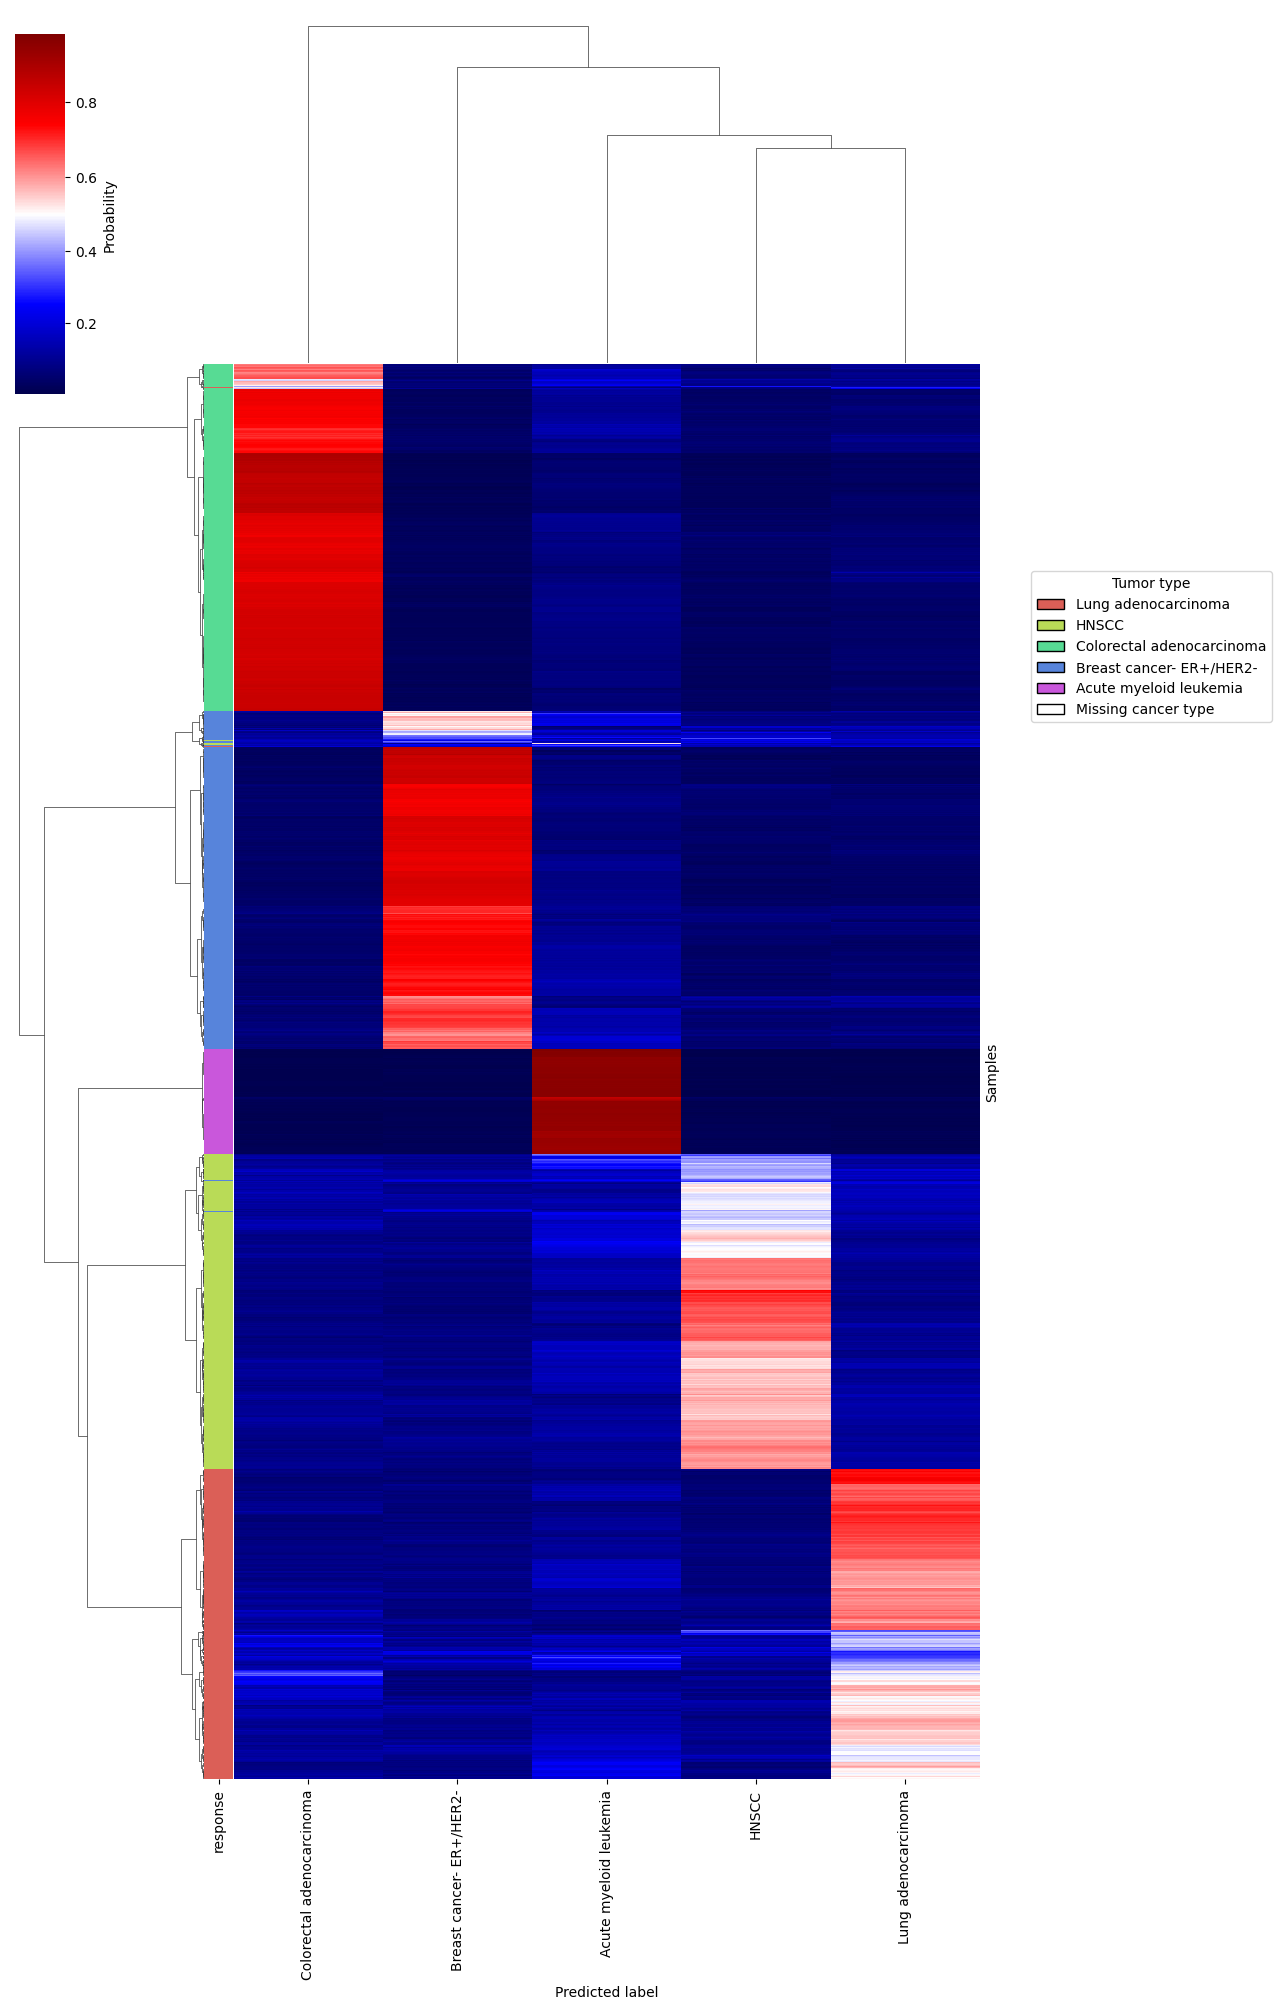

In [6]:
ypredict_probs = cforest.predict(newx=tcga_data.drop(columns=["response"]), type="prob")
ypredict = cforest.predict(newx=tcga_data.drop(columns=["response"]), type="response")
cforest.runID = "tcga_assessment"
cforest.assess(ytrue=tcga_data["response"], ypredict=ypredict, ypredict_probs=ypredict_probs, name="clustermap_tcga")

# Feature Importance

Feature importance may be calculated like below, but it may take a while. I shall therefore load it from a file.

In [ ]:
from rpy2 import robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

importr("partykit")
robjects.r.assign("best_forest", cforest.fitted_model)

print(robjects.r("data.frame(varimp(best_forest, cores = 50, conditional = FALSE))"))